Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: https://github.com/Megunut/CMSC-197-hw2-

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# %matplotlib inline

In [5]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [7]:
data.head(2)

Unnamed: 0                                  movie_title  color  \
0           0                                    b'Avatar'  Color   
1           1  b"Pirates of the Caribbean: At World's End"  Color   

    director_name  num_critic_for_reviews  duration  director_facebook_likes  \
0   James Cameron                   723.0     178.0                      0.0   
1  Gore Verbinski                   302.0     169.0                    563.0   

   actor_3_facebook_likes      actor_2_name  actor_1_facebook_likes  ...  \
0                   855.0  Joel David Moore                  1000.0  ...   
1                  1000.0     Orlando Bloom                 40000.0  ...   

   num_user_for_reviews language country  content_rating       budget  \
0                3054.0  English     USA           PG-13  237000000.0   
1                1238.0  English     USA           PG-13  300000000.0   

  title_year  actor_2_facebook_likes imdb_score aspect_ratio  \
0     2009.0                   936.0        7.9         1.78   
1     2007.0                  5000.0        7.1         2.35   

   movie_facebook_likes  
0               33000.0  
1                   0.0  

[2 rows x 29 columns]

## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [9]:
# displays a list of the top 10 directors with most movies
top_10_directors = data.groupby("director_name").size().sort_values(ascending=False)[1:11]
top_10_directors

director_name
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Steven Soderbergh    16
Spike Lee            16
Tim Burton           16
Renny Harlin         15
Oliver Stone         14
dtype: int64

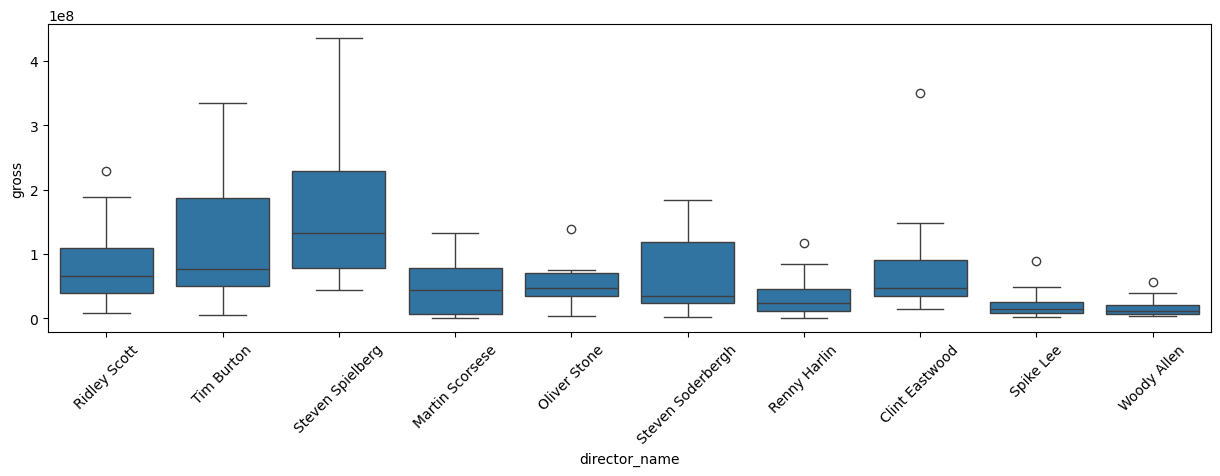

In [11]:
top_10_directors = data.groupby("director_name").size().sort_values(ascending=False)[1:11]
top_10_directors

# retrieves the data from dataset which match the selected directors
top_10_directors = top_10_directors.index
top_10_directors_data = data[data['director_name'].isin(top_10_directors) & data['gross']] 
top_10_directors_data

# creates a boxplot  of gross earnings of the top 10 directors
plt.figure(figsize=(15,4))
sns.boxplot(x="director_name", y="gross", data=top_10_directors_data)
plt.xticks(rotation=45)
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

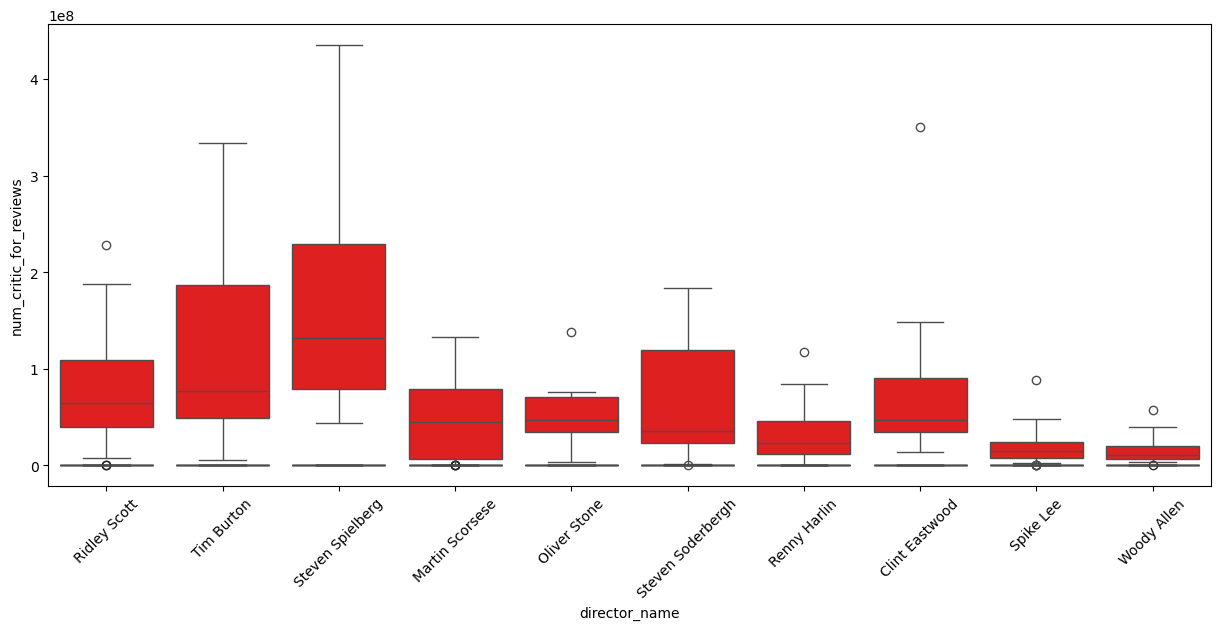

In [17]:
plt.figure(figsize=(15,6))

# creates a boxplot of num_critic_for_reviews
sns.boxplot(x="director_name", y="num_critic_for_reviews", data=top_10_directors_data, color="teal")
# creates a boxplot of IMDB score
sns.boxplot(x="director_name", y="imdb_score", data=top_10_directors_data, color="blue" )
# creates a boxplot of gross
sns.boxplot(x="director_name", y="gross", data=top_10_directors_data, color="red")
plt.xticks(rotation=45)
plt.show()


## Compute Sales (Gross - Budget), add it as another column

In [23]:
data['sales'] = data['gross'] - data['budget'] 
data

Unnamed: 0                                        movie_title  color  \
0              0                                          b'Avatar'  Color   
1              1        b"Pirates of the Caribbean: At World's End"  Color   
2              2                                         b'Spectre'  Color   
3              3                           b'The Dark Knight Rises'  Color   
4              4  b'Star Wars: Episode VII - The Force Awakens  ...      0   
...          ...                                                ...    ...   
5039        5039                       b'The Following            '  Color   
5040        5040                            b'A Plague So Pleasant'  Color   
5041        5041                                b'Shanghai Calling'  Color   
5042        5042                               b'My Date with Drew'  Color   
5043        5043                             b'Starting Over Again'      0   

          director_name  num_critic_for_reviews  duration  \
0         James Cameron                   723.0     178.0   
1        Gore Verbinski                   302.0     169.0   
2            Sam Mendes                   602.0     148.0   
3     Christopher Nolan                   813.0     164.0   
4           Doug Walker                     0.0       0.0   
...                 ...                     ...       ...   
5039                  0                    43.0      43.0   
5040   Benjamin Roberds                    13.0      76.0   
5041        Daniel Hsia                    14.0     100.0   
5042           Jon Gunn                    43.0      90.0   
5043     Olivia Lamasan                     0.0       0.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     0.0        Rob Walker   
...                       ...                     ...               ...   
5039                      0.0                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   
5043                      0.0                     0.0      Toni Gonzaga   

      actor_1_facebook_likes  ...  language      country content_rating  \
0                     1000.0  ...   English          USA          PG-13   
1                    40000.0  ...   English          USA          PG-13   
2                    11000.0  ...   English           UK          PG-13   
3                    27000.0  ...   English          USA          PG-13   
4                      131.0  ...         0            0              0   
...                      ...  ...       ...          ...            ...   
5039                   841.0  ...   English          USA          TV-14   
5040                     0.0  ...   English          USA              0   
5041                   946.0  ...   English          USA          PG-13   
5042                    86.0  ...   English          USA             PG   
5043                     0.0  ...         0  Philippines             PG   

           budget  title_year actor_2_facebook_likes  imdb_score aspect_ratio  \
0     237000000.0      2009.0                  936.0         7.9         1.78   
1     300000000.0      2007.0                 5000.0         7.1         2.35   
2     245000000.0      2015.0                  393.0         6.8         2.35   
3     250000000.0      2012.0                23000.0         8.5         2.35   
4             0.0         0.0                   12.0         7.1         0.00   
...           ...         ...                   

## Which directors garnered the most total sales?

In [29]:
top_10_directors = data.groupby("director_name").size().sort_values(ascending=False)[1:11]
top_10_directors

# retrieves the data from dataset which match the selected directors
top_10_directors = top_10_directors.index
top_10_directors_data = data[data['director_name'].isin(top_10_directors) & data['gross']] 
top_10_directors_data

directors_most_sales = top_10_directors_data.groupby("director_name")["sales"].sum().sort_values(ascending = False)
directors_most_sales[0:1]


director_name
Steven Spielberg    2.486332e+09
Name: sales, dtype: float64

## Answer: Steven Spielberg

## Plot sales and average likes as a scatterplot. Fit it with a line.

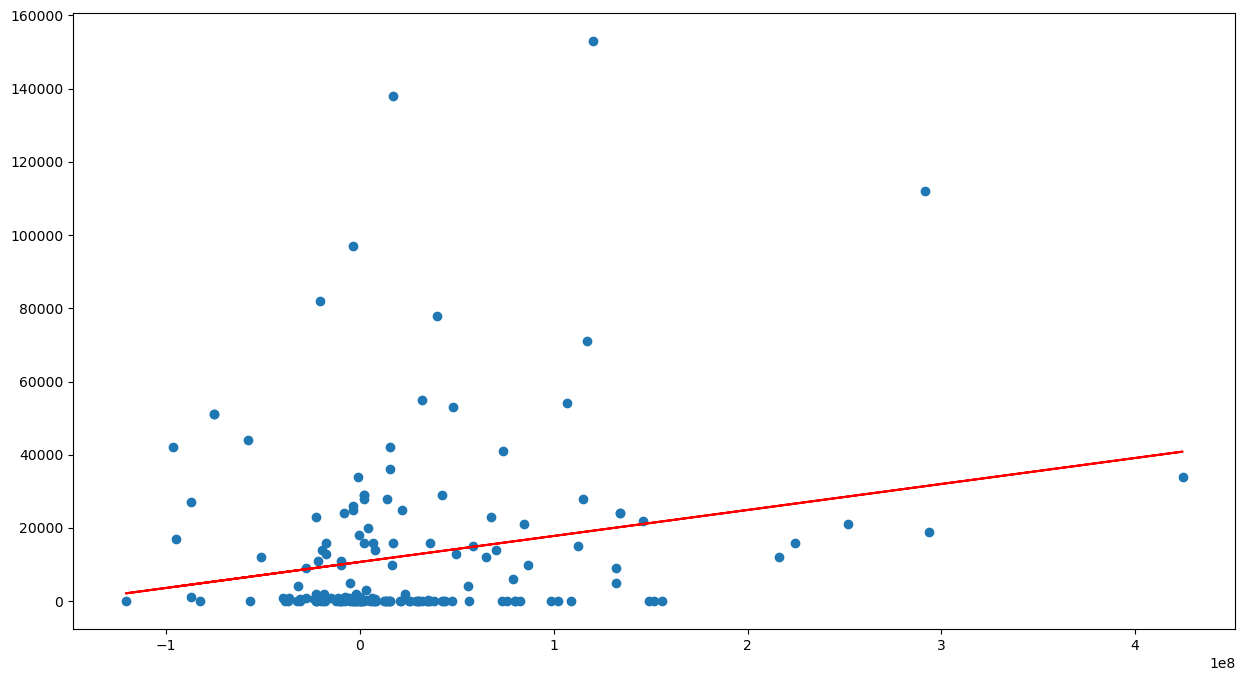

In [84]:
# creates a scatterplot using sales and movie_facebook_likes
fig = plt.figure(figsize=(15,8))
plt.scatter(top_10_directors_data["sales"], top_10_directors_data["movie_facebook_likes"])

# creates line of best fit for scatterplot
m, b = np.polyfit(top_10_directors_data["sales"], top_10_directors_data["movie_facebook_likes"], 1)
plt.plot(top_10_directors_data["sales"], m*top_10_directors_data["sales"] + b, color='red')

plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

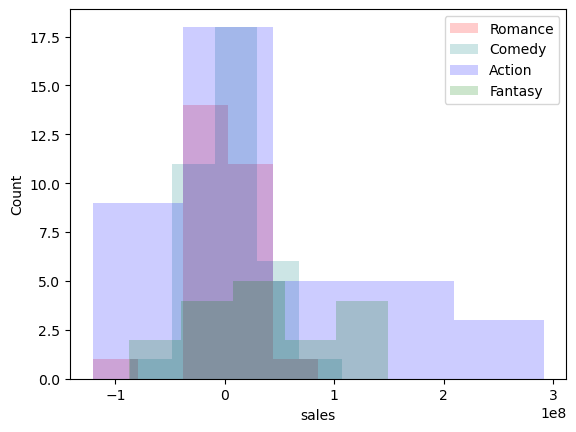

In [90]:
# Filters data based on whether it contains the selected genre
romance = top_10_directors_data['genres'].str.contains('Romance')
comedy = top_10_directors_data['genres'].str.contains('Comedy')
action = top_10_directors_data['genres'].str.contains('Action')
fantasy = top_10_directors_data['genres'].str.contains('Fantasy')

# Plots histogram from genres
ax = sns.histplot(top_10_directors_data["sales"][romance],bins=5, color="red", label="Romance",linewidth=0, alpha=0.2, )
sns.histplot(top_10_directors_data["sales"][comedy],bins=5, color="teal", label="Comedy", linewidth=0, ax=ax, alpha=0.2)
sns.histplot(top_10_directors_data["sales"][action],bins=5, color="blue", label="Action", linewidth=0, ax=ax, alpha=0.2)
sns.histplot(top_10_directors_data["sales"][fantasy],bins=5, color="green", label="Fantasy", linewidth=0, ax=ax, alpha=0.2)

ax.legend()


## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [35]:
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes']].mean(axis=1)
data

Unnamed: 0                                        movie_title  color  \
0              0                                          b'Avatar'  Color   
1              1        b"Pirates of the Caribbean: At World's End"  Color   
2              2                                         b'Spectre'  Color   
3              3                           b'The Dark Knight Rises'  Color   
4              4  b'Star Wars: Episode VII - The Force Awakens  ...      0   
...          ...                                                ...    ...   
5039        5039                       b'The Following            '  Color   
5040        5040                            b'A Plague So Pleasant'  Color   
5041        5041                                b'Shanghai Calling'  Color   
5042        5042                               b'My Date with Drew'  Color   
5043        5043                             b'Starting Over Again'      0   

          director_name  num_critic_for_reviews  duration  \
0         James Cameron                   723.0     178.0   
1        Gore Verbinski                   302.0     169.0   
2            Sam Mendes                   602.0     148.0   
3     Christopher Nolan                   813.0     164.0   
4           Doug Walker                     0.0       0.0   
...                 ...                     ...       ...   
5039                  0                    43.0      43.0   
5040   Benjamin Roberds                    13.0      76.0   
5041        Daniel Hsia                    14.0     100.0   
5042           Jon Gunn                    43.0      90.0   
5043     Olivia Lamasan                     0.0       0.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     0.0        Rob Walker   
...                       ...                     ...               ...   
5039                      0.0                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   
5043                      0.0                     0.0      Toni Gonzaga   

      actor_1_facebook_likes  ...      country content_rating       budget  \
0                     1000.0  ...          USA          PG-13  237000000.0   
1                    40000.0  ...          USA          PG-13  300000000.0   
2                    11000.0  ...           UK          PG-13  245000000.0   
3                    27000.0  ...          USA          PG-13  250000000.0   
4                      131.0  ...            0              0          0.0   
...                      ...  ...          ...            ...          ...   
5039                   841.0  ...          USA          TV-14          0.0   
5040                     0.0  ...          USA              0       1400.0   
5041                   946.0  ...          USA          PG-13          0.0   
5042                    86.0  ...          USA             PG       1100.0   
5043                     0.0  ...  Philippines             PG          0.0   

      title_year  actor_2_facebook_likes imdb_score  aspect_ratio  \
0         2009.0                   936.0        7.9          1.78   
1         2007.0                  5000.0        7.1          2.35   
2         2015.0                   393.0        6.8          2.35   
3         2012.0                 23000.0        8.5          2.35   
4            0.0                    12.0        7.1          0.00   
...          ...                     ...        ...           ...   
5039         0.

## Copying the whole dataframe

In [37]:
df = data.copy()
df.head()

Unnamed: 0                                        movie_title  color  \
0           0                                          b'Avatar'  Color   
1           1        b"Pirates of the Caribbean: At World's End"  Color   
2           2                                         b'Spectre'  Color   
3           3                           b'The Dark Knight Rises'  Color   
4           4  b'Star Wars: Episode VII - The Force Awakens  ...      0   

       director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                     0.0       0.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     0.0        Rob Walker   

   actor_1_facebook_likes  ...  country content_rating       budget  \
0                  1000.0  ...      USA          PG-13  237000000.0   
1                 40000.0  ...      USA          PG-13  300000000.0   
2                 11000.0  ...       UK          PG-13  245000000.0   
3                 27000.0  ...      USA          PG-13  250000000.0   
4                   131.0  ...        0              0          0.0   

   title_year  actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                   936.0        7.9          1.78   
1      2007.0                  5000.0        7.1          2.35   
2      2015.0                   393.0        6.8          2.35   
3      2012.0                 23000.0        8.5          2.35   
4         0.0                    12.0        7.1          0.00   

  movie_facebook_likes        sales  average_actor_likes  
0              33000.0  523505847.0           930.333333  
1                  0.0    9404152.0         15333.333333  
2              85000.0  -44925825.0          3851.333333  
3             164000.0  198130642.0         24333.333333  
4                  0.0          0.0            47.666667  

[5 rows x 31 columns]

## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [39]:
df.dtypes

Unnamed: 0                     int64
movie_title                   object
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users              float64
cast_total_facebook_likes    float64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
a

In [41]:
max = df['num_critic_for_reviews'].max()
min = df['num_critic_for_reviews'].min()
df['nm_num_critic_for_reviews'] = (df['num_critic_for_reviews'] - min) / (max-min)

In [43]:
max = df['duration'].max()
min = df['duration'].min()
df['nm_duration'] = (df['duration'] - min) / (max-min)

In [45]:
max = df['director_facebook_likes'].max()
min = df['director_facebook_likes'].min()
df['nm_director_facebook_likes'] = (df['director_facebook_likes'] - min) / (max-min)

In [47]:
max = df['actor_3_facebook_likes'].max()
min = df['actor_3_facebook_likes'].min()
df['nm_actor_3_facebook_likes'] = (df['actor_3_facebook_likes'] - min) / (max-min)

In [49]:
max = df['actor_1_facebook_likes'].max()
min = df['actor_1_facebook_likes'].min()
df['nm_actor_1_facebook_likes'] = (df['actor_1_facebook_likes'] - min) / (max-min)

In [51]:
max = df['gross'].max()
min = df['gross'].min()
df['nm_gross'] = (df['gross'] - min) / (max-min)

In [53]:
max = df['num_voted_users'].max()
min = df['num_voted_users'].min()
df['nm_num_voted_users'] = (df['num_voted_users'] - min) / (max-min)

In [55]:
max = df['cast_total_facebook_likes'].max()
min = df['cast_total_facebook_likes'].min()
df['nm_cast_total_facebook_likes'] = (df['cast_total_facebook_likes'] - min) / (max-min)

In [57]:
max = df['facenumber_in_poster'].max()
min = df['facenumber_in_poster'].min()
df['nm_facenumber_in_poster'] = (df['facenumber_in_poster'] - min) / (max-min)

In [59]:
max = df['num_user_for_reviews'].max()
min = df['num_user_for_reviews'].min()
df['nm_num_user_for_reviews'] = (df['num_user_for_reviews'] - min) / (max-min)

In [61]:
max = df['budget'].max()
min = df['budget'].min()
df['nm_budget'] = (df['budget'] - min) / (max-min)

In [63]:
max = df['title_year'].max()
min = df['title_year'].min()
df['nm_title_year'] = (df['title_year'] - min) / (max-min)

In [65]:
max = df['actor_2_facebook_likes'].max()
min = df['actor_2_facebook_likes'].min()
df['nm_actor_2_facebook_likes'] = (df['actor_2_facebook_likes'] - min) / (max-min)

In [67]:
max = df['imdb_score'].max()
min = df['imdb_score'].min()
df['nm_imdb_score'] = (df['imdb_score'] - min) / (max-min)

In [69]:
max = df['aspect_ratio'].max()
min = df['aspect_ratio'].min()
df['nm_aspect_ratio'] = (df['aspect_ratio'] - min) / (max-min)

In [71]:
max = df['movie_facebook_likes'].max()
min = df['movie_facebook_likes'].min()
df['nm_movie_facebook_likes'] = (df['movie_facebook_likes'] - min) / (max-min)

In [73]:
max = df['sales'].max()
min = df['sales'].min()
df['nm_sales'] = (df['sales'] - min) / (max-min)
df

Unnamed: 0                                        movie_title  color  \
0              0                                          b'Avatar'  Color   
1              1        b"Pirates of the Caribbean: At World's End"  Color   
2              2                                         b'Spectre'  Color   
3              3                           b'The Dark Knight Rises'  Color   
4              4  b'Star Wars: Episode VII - The Force Awakens  ...      0   
...          ...                                                ...    ...   
5039        5039                       b'The Following            '  Color   
5040        5040                            b'A Plague So Pleasant'  Color   
5041        5041                                b'Shanghai Calling'  Color   
5042        5042                               b'My Date with Drew'  Color   
5043        5043                             b'Starting Over Again'      0   

          director_name  num_critic_for_reviews  duration  \
0         James Cameron                   723.0     178.0   
1        Gore Verbinski                   302.0     169.0   
2            Sam Mendes                   602.0     148.0   
3     Christopher Nolan                   813.0     164.0   
4           Doug Walker                     0.0       0.0   
...                 ...                     ...       ...   
5039                  0                    43.0      43.0   
5040   Benjamin Roberds                    13.0      76.0   
5041        Daniel Hsia                    14.0     100.0   
5042           Jon Gunn                    43.0      90.0   
5043     Olivia Lamasan                     0.0       0.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     0.0        Rob Walker   
...                       ...                     ...               ...   
5039                      0.0                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   
5043                      0.0                     0.0      Toni Gonzaga   

      actor_1_facebook_likes  ...  nm_cast_total_facebook_likes  \
0                     1000.0  ...                      0.007361   
1                    40000.0  ...                      0.073622   
2                    11000.0  ...                      0.017816   
3                    27000.0  ...                      0.162561   
4                      131.0  ...                      0.000218   
...                      ...  ...                           ...   
5039                   841.0  ...                      0.002669   
5040                     0.0  ...                      0.000000   
5041                   946.0  ...                      0.003633   
5042                    86.0  ...                      0.000248   
5043                     0.0  ...                      0.000000   

     nm_facenumber_in_poster nm_num_user_for_reviews     nm_budget  \
0                   0.000000                0.603557  1.940158e-02   
1                   0.000000                0.244664  2.455896e-02   
2                   0.023256                0.196443  2.005649e-02   
3                   0.000000                0.533794  2.046580e-02   
4                   0.000000                0.000000  0.000000e+00   
...                      ...                     ...           ...   
5039                0.023256                0.070949  0.000000e+00   
5040                0.000000                0.000593  1.146085e-07   
